# Decision Trees

## O que são?

As árvores de decisão são modelos que podem ser aplicados em problemas de regressão e classificação, além de serem capazes de trabalhar com dados numéricos e categóricos.

Esses modelos analisam os dados e formulam comparações para classificá-los, como um grande conjunto de IF/ELSE, por exemplo:

|Idade|Peso (kg)|
|-----|----|
|10|25|
|20|70|
|30|85|
|60|50|

Se idade < 20 peso = 25; Senão se idade < 60 peso = 77; Senão peso = 50.

## Exemplos

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

### Árvores de decisão para classificação

##### Classificação do dataset iris, utilizando árvore de classificação

In [2]:
#Importando dataset
from sklearn.datasets import load_iris

data = load_iris()

X = data.data
y = data.target

In [3]:
#Dividindo dados em treino e teste utilizando train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size = 0.25)

In [4]:
#importando modelo árvore
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [16]:
#Avaliando
from sklearn.metrics import accuracy_score
print("Real accuracy - train data", accuracy_score(y_true=y_train, y_pred=classifier.predict(X_train)))
print("Test accuracy - test data", accuracy_score(y_true=y_test, y_pred=classifier.predict(X_test)))

Real accuracy - train data 1.0
Real accuracy - test data 0.9473684210526315


In [17]:
#Mudando critério para "entropy"
clf_ent = DecisionTreeClassifier(criterion='entropy')
clf_ent.fit(X_train, y_train)

print("Real accuracy - train data", accuracy_score(y_true=y_train, y_pred=clf_ent.predict(X_train)))
print("Test accuracy - test data", accuracy_score(y_true=y_test, y_pred=clf_ent.predict(X_test)))

Real accuracy - train data 1.0
Test accuracy - test data 0.9473684210526315


In [19]:
#Alterando o número mínimo de registros em um nó
clf_min = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
clf_min.fit(X_train, y_train)

print("Real accuracy - train data", accuracy_score(y_true=y_train, y_pred=clf_min.predict(X_train)))
print("Test accuracy - test data", accuracy_score(y_true=y_test, y_pred=clf_min.predict(X_test)))

Real accuracy - train data 0.9642857142857143
Test accuracy - test data 0.9473684210526315


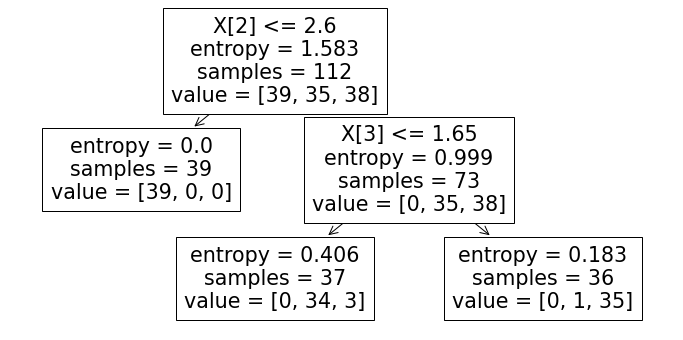

In [21]:
#Visualizando árvore
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(clf_min)
plt.show()

### Árvores de classificação para regressão

Utilizando dataset de diabetes.

X -> valores quantitativos como idade, massa corporal, pressão sanguínea média

y -> prograssão da doença um ano após a colheita dos dados

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

X, y = load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size = 0.25)

In [60]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

print("Real accuracy - train data", accuracy_score(y_true=y_train, y_pred=tree_reg.predict(X_train)))
print("Test accuracy - test data", accuracy_score(y_true=y_test, y_pred=tree_reg.predict(X_test)))

Real accuracy - train data 1.0
Test accuracy - test data 0.009009009009009009


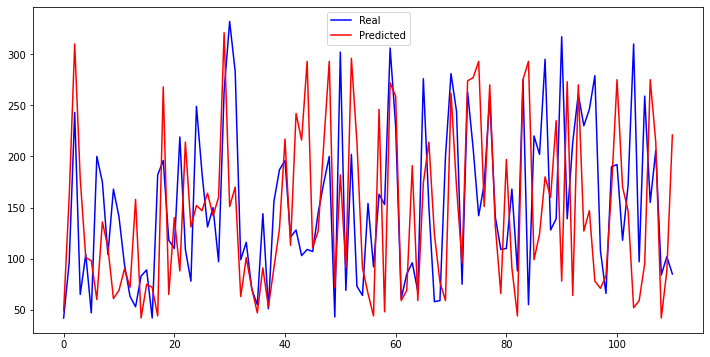

In [37]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(len(X_test)), y_test, color='blue')
plt.plot(np.arange(len(X_test)), tree_reg.predict(X_test), color='red')

plt.legend(['Real','Predicted'])
plt.show()

### Hiperparâmetros

##### - min_samples_split :
Número mínimo de data points em um nó para que ele seja ramificado

##### max_depth:
Profundidade máxima da árvore

##### Criterion:
Funções para medir a qualidade da divisão dos nós

##### Splitter:
Estratégia utilizada para dividir os nós ('best', 'random')

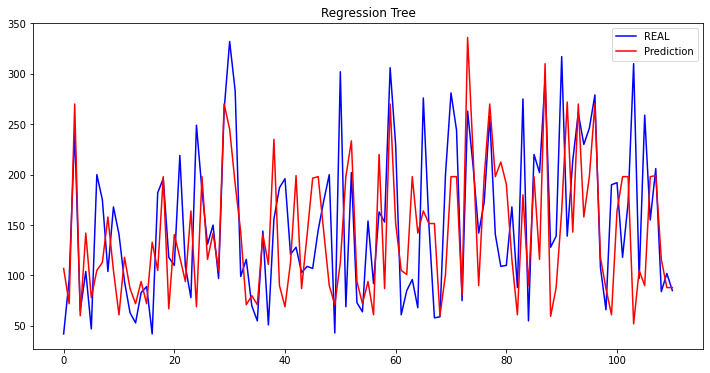

In [71]:
# Criando modelo com melhores resultados

reg = DecisionTreeRegressor(criterion='mae', splitter='random', min_samples_split = 10)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


plt.figure(figsize=(12,6))
plt.plot(y_test, color='blue', label='REAL')
plt.plot(y_pred, color='red', label='Prediction')

plt.title('Regression Tree')
plt.legend()
plt.show()


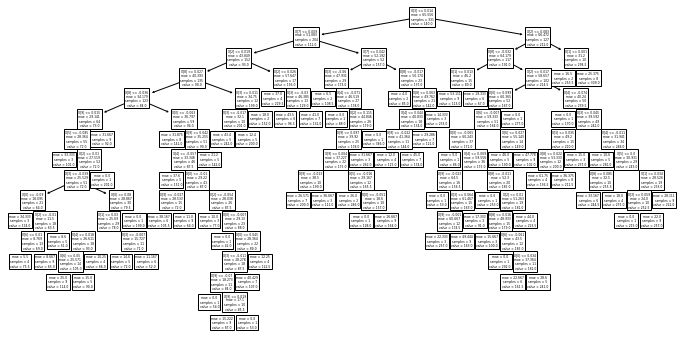

In [69]:
plt.figure(figsize=(12,6))
plot_tree(reg)
plt.show()

##### Ações do facebook

In [6]:
# Carregando Dataset
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 6, 1)
start = dt.datetime(2019, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})

df.tail()

,Close 0
351,232.199997
352,229.139999
353,225.460007
354,225.089996
355,231.910004


In [7]:
#Criando registros consecutivos
def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
new_df = window(df,3)
new_df = new_df.rename(columns={'Close 0': 'Target'})
new_df.dropna(inplace=True)
new_df.head()

,Target,Close 1,Close 2
2,137.949997,131.740005,135.679993
3,138.050003,137.949997,131.740005
4,142.529999,138.050003,137.949997
5,144.229996,142.529999,138.050003
6,144.199997,144.229996,142.529999


In [ ]:
df

In [164]:
#separando dados
X = new_df.loc[:,['Close 1','Close 2']]
Y = new_df.loc[:,'Target'].tolist()

limit = int(len(new_df)*0.75)
df_train, df_test = new_df[:limit], new_df[limit:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

In [165]:
ts_reg = DecisionTreeRegressor(criterion='mae', splitter='random', min_samples_split = 10)
ts_reg.fit(X_train, y_train)

y_pred = ts_reg.predict(X)

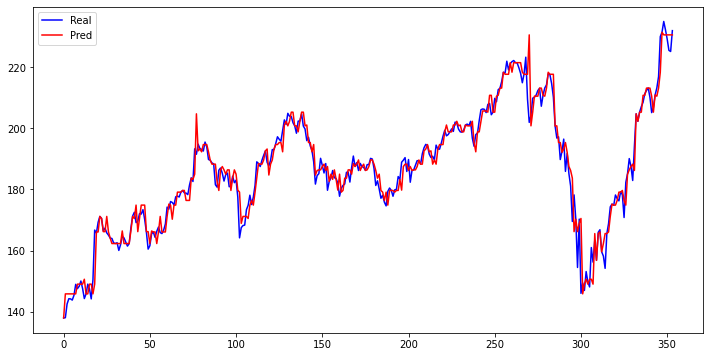

In [166]:
plt.figure(figsize=(12,6))

plt.plot(Y, color='blue', label='Real')
plt.plot(y_pred, color='red', label='Pred')

plt.legend()
plt.show()

#### Utilizando valores preditos para prever novos

In [23]:
from sklearn.tree import DecisionTreeRegressor
import pandas_datareader.data as web
import datetime as dt

end = dt.datetime(2020, 9, 1)
start = dt.datetime(2015, 1, 1)

df = web.DataReader("FB", 'yahoo', start, end)

df = df.reset_index()
df = df.drop(columns=['Open','Date','High','Low','Volume','Adj Close'])
df = df.rename(columns={'Close': 'Close 0'})

df.head()

,Close 0
0,78.449997
1,77.190002
2,76.150002
3,76.150002
4,78.180000


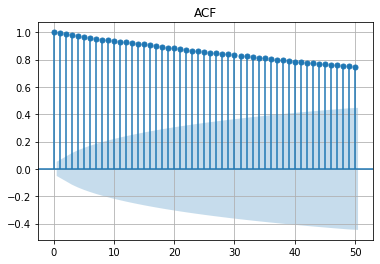

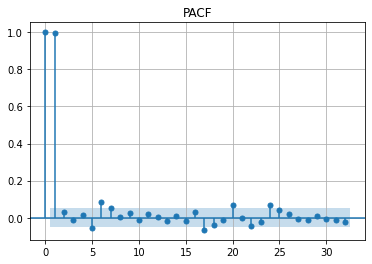

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plotando função de autocorrelação
plot_acf(df, title = 'ACF', lags=50)
plt.grid()

#Plotando função de autocorrelação parcial
plot_pacf(df, title = 'PACF')
plt.grid()

plt.show()

In [24]:
def window (df, w):
    for i in range(1,w):
        df['Close '+str(i)] = df['Close '+str(i-1)].shift(1)
    return df
        
new_df = window(df,10)
new_df = new_df.rename(columns={'Close 0': 'Target'})
new_df.dropna(inplace=True)

original = new_df.copy()

new_df = new_df.diff()
new_df.dropna(inplace=True)
new_df.head()

,Target,Close 1,Close 2,Close 3,Close 4,Close 5,Close 6,Close 7,Close 8,Close 9
10,1.129997,-2.229996,-0.169998,-0.270004,-1.019997,-0.440002,2.029999,0.000000,-1.040001,-1.259995
11,1.059998,1.129997,-2.229996,-0.169998,-0.270004,-1.019997,-0.440002,2.029999,0.000000,-1.040001
12,0.500000,1.059998,1.129997,-2.229996,-0.169998,-0.270004,-1.019997,-0.440002,2.029999,0.000000
13,0.910004,0.500000,1.059998,1.129997,-2.229996,-0.169998,-0.270004,-1.019997,-0.440002,2.029999
14,0.180000,0.910004,0.500000,1.059998,1.129997,-2.229996,-0.169998,-0.270004,-1.019997,-0.440002


In [25]:
#Separando treino e teste
limit = int(len(new_df)*0.75)

df_train, df_test = new_df[:limit], new_df[limit:]

X = new_df.loc[:,['Close 1','Close 2','Close 3','Close 4','Close 5','Close 6','Close 7','Close 8','Close 9']]
Y = new_df.loc[:,'Target'].tolist()

X_train, X_test = X[:limit], X[limit:]
Y_train, Y_test = Y[:limit], Y[limit:]

In [26]:
#Criando modelo
ts_reg = DecisionTreeRegressor(criterion='mae', splitter='random', min_samples_split = 10)
ts_reg.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mae', min_samples_split=10, splitter='random')

In [28]:
def teste (model, t, df):
    results = []
    my_df = df.copy()
    for i in range (t):
        c1 = my_df.tail(1)['Target'].values #Fechamento do dia anterior (alvo de ontem)
        c2 = my_df.tail(1)['Close 1'].values #Fechamento de dois dias atrás (fechamento de antes de ontem)
        c3 = my_df.tail(1)['Close 2'].values
        c4 = my_df.tail(1)['Close 3'].values
        c5 = my_df.tail(1)['Close 4'].values
        c6 = my_df.tail(1)['Close 5'].values
        c7 = my_df.tail(1)['Close 6'].values
        c8 = my_df.tail(1)['Close 7'].values
        c9 = my_df.tail(1)['Close 8'].values
        xt = np.vstack((c1,c2,c3,c4,c5,c6,c7,c8,c9)).T
        y = model.predict(xt)
        df2 = pd.DataFrame({"Target":y, "Close 1":c1, "Close 2":c2, "Close 3":c3, "Close 4":c4, "Close 5":c5,
                           "Close 6":c6, "Close 7":c7, "Close 8":c8, "Close 9":c9}) 
        my_df = my_df.append(df2, ignore_index = True)
    return my_df
        
df_res = teste(ts_reg, len(df_test), df_train)

df_res

,Target,Close 1,Close 2,Close 3,Close 4,Close 5,Close 6,Close 7,Close 8,Close 9
0,1.129997,-2.229996,-0.169998,-0.270004,-1.019997,-0.440002,2.029999,0.000000,-1.040001,-1.259995
1,1.059998,1.129997,-2.229996,-0.169998,-0.270004,-1.019997,-0.440002,2.029999,0.000000,-1.040001
2,0.500000,1.059998,1.129997,-2.229996,-0.169998,-0.270004,-1.019997,-0.440002,2.029999,0.000000
3,0.910004,0.500000,1.059998,1.129997,-2.229996,-0.169998,-0.270004,-1.019997,-0.440002,2.029999
4,0.180000,0.910004,0.500000,1.059998,1.129997,-2.229996,-0.169998,-0.270004,-1.019997,-0.440002
...,...,...,...,...,...,...,...,...,...,...
1412,1.129997,-1.570000,-0.770000,1.364994,-1.119995,0.395004,-0.469994,-0.990005,0.000000,-0.779999
1413,0.530006,1.129997,-1.570000,-0.770000,1.364994,-1.119995,0.395004,-0.469994,-0.990005,0.000000
1414,-0.190002,0.530006,1.129997,-1.570000,-0.770000,1.364994,-1.119995,0.395004,-0.469994,-0.990005
1415,-5.050003,-0.190002,0.530006,1.129997,-1.570000,-0.770000,1.364994,-1.119995,0.395004,-0.469994


In [29]:
# Retornando valores alvo à escala inicial

result_orig = []
f = original['Target'].head(1).values 
for d in df_res['Target']:
    f = d + f
    result_orig.append(f)

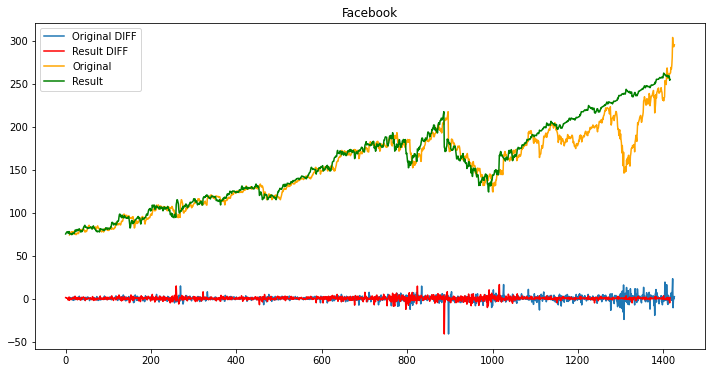

In [30]:
plt.figure(figsize=(12,6))

plt.plot(new_df['Target'], label='Original DIFF')
plt.plot(df_res['Target'], color='red', label='Result DIFF')

plt.plot(original['Target'], color='orange', label='Original')
plt.plot(result_orig, color='green', label='Result')

plt.title('Facebook')
plt.legend()
plt.show()

#### Conclusão

A árvore de decisão conseguiu acompanhaar a tendência de movimentação das ações do Facebook, contudo não conseguiu prever valores exatos